In [ ]:
import pandas as pd

## Live projects

In [ ]:
df_live = pd.read_csv('live.csv', encoding='cp1252', index_col=0)
df_live.info()

## Ended projects

In [ ]:
df_ended = pd.read_csv('ended.csv', encoding='cp1252', index_col=0)
df_ended.info()

## Merging live with ended

In [ ]:
# rename columns
df_ended.rename(columns=lambda name: name+'_end', inplace=True)

In [ ]:
# merge projects to single dataframe
df_projects = df_live.merge(df_ended, left_on='id', right_on='id_end')
df_projects.info()

### Cleaning merged dataset

In [ ]:
# drop duplicate columns
cols_to_drop = []
for col in df_live.columns:
    try:
        (df_projects[col] != df_projects[col+'_end']).value_counts()[True]
    except KeyError:
        cols_to_drop.append(col+'_end')
print(cols_to_drop)
df_projects.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
# drop columns with less than 50% of values
df_projects.dropna(axis=1, thresh=df_projects.shape[0]/2, inplace=True)

In [ ]:
df_projects.info()

### Resolving inconsistency

#### launched_at

In [ ]:
df_projects.plot(x='launched_at', y='launched_at_end', kind='scatter', figsize=(8,8))

In [ ]:
# this should not contain True, but it does => inconsistency in dataset
(df_projects['launched_at'] != df_projects['launched_at_end']).value_counts()

In [ ]:
# look at values
df_projects[(df_projects['launched_at'] != df_projects['launched_at_end'])][['id','name','launched_at','launched_at_end']]

In [ ]:
# first value is incorrect, drop first column
# https://www.kickstarter.com/projects/1428469449/instant-hydrator-hydratesall-natural-digestive-ph
df_projects.drop('launched_at', axis=1, inplace=True)

#### deadline

In [ ]:
df_projects.plot(x='deadline', y='deadline_end', kind='scatter', figsize=(8,8))

In [ ]:
# this should not contain True, but it does => inconsistency in dataset
(df_projects['deadline'] != df_projects['deadline_end']).value_counts()

In [ ]:
# look at values
df_projects[(df_projects['deadline'] != df_projects['deadline_end'])][['id','name','deadline','deadline_end']].head(10)

In [ ]:
# first values are incorrect again, drop first column
df_projects.drop('deadline', axis=1, inplace=True)

In [ ]:
df_projects.to_csv('projects.csv')

## Analysing dataset

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [46]:
# seaborn causes bugs in pyplot (e.g. hiding outliers in boxplot)
import seaborn as sns

In [2]:
# set default figsize
plt.rcParams['figure.figsize'] = [15, 6]

In [3]:
df_projects = pd.read_csv('projects.csv', encoding='cp1252', index_col=0)
df_projects.head()

C:\Users\Patrik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,backers_count,blurb,category,country,created_at,creator,currency,currency_symbol,currency_trailing_code,disable_communication,...,profile_end,scraped_at_end,source_url_end,spotlight_end,staff_pick_end,state_end,state_changed_at_end,static_usd_rate_end,urls_end,usd_pledged_end
0,22,Help SCDT fund their inaugural performance in ...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",US,1444460998,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",USD,$,True,False,...,"{""background_image_opacity"":0.8,""link_text_col...",1.450359e+09,https://www.kickstarter.com/discover/categorie...,True,NaN,successful,1448092740,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",8441.0
1,0,This is where inspired dancers from all ages g...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",NL,1444938006,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",EUR,€,False,False,...,"{""background_image_opacity"":0.8,""link_text_col...",1.450359e+09,https://www.kickstarter.com/discover/categorie...,False,NaN,failed,1447975466,1.136392,"{""web"":{""project"":""https://www.kickstarter.com...",0.0
2,1,In our 8th year of equipping students to give ...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",US,1444906983,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",USD,$,True,False,...,"{""background_image_opacity"":0.8,""link_text_col...",1.450359e+09,https://www.kickstarter.com/discover/categorie...,False,NaN,failed,1448326800,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",70.0
3,1,Verve Collisionz is a hip hop group at the Uni...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",US,1444919408,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",USD,$,True,False,...,"{""background_image_opacity"":0.8,""link_text_col...",1.453982e+09,https://www.kickstarter.com/discover/categorie...,True,False,successful,1450814542,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",904.0
4,5,Verve Collisionz is a hip hop group at the Uni...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",US,1444919408,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",USD,$,True,False,...,"{""background_image_opacity"":0.8,""link_text_col...",1.453982e+09,https://www.kickstarter.com/discover/categorie...,True,False,successful,1450814542,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",904.0


In [4]:
df_projects.describe()

,backers_count,created_at,goal,id,pledged,scraped_at,state_changed_at,static_usd_rate,usd_pledged,backers_count_end,deadline_end,launched_at_end,pledged_end,scraped_at_end,state_changed_at_end,static_usd_rate_end,usd_pledged_end
count,65038.000000,6.503800e+04,6.503800e+04,6.503800e+04,6.503800e+04,6.503800e+04,6.503800e+04,65038.000000,6.503800e+04,65038.000000,6.503800e+04,6.503800e+04,6.503800e+04,6.503800e+04,6.503800e+04,65038.000000,6.503800e+04
mean,93.181801,1.467838e+09,7.045290e+04,1.073002e+09,9.706526e+03,1.474094e+09,1.472475e+09,0.994714,8.547335e+03,159.475753,1.475652e+09,1.472475e+09,1.708096e+04,1.477562e+09,1.475610e+09,0.994716,1.502729e+04
std,924.687360,2.076627e+07,1.474647e+06,6.193397e+08,8.741706e+04,1.669881e+07,1.677239e+07,0.220278,8.302131e+04,1272.604621,1.672703e+07,1.677237e+07,1.353804e+05,1.639163e+07,1.672708e+07,0.220277,1.264395e+05
min,0.000000,1.266343e+09,1.000000e+00,1.852000e+04,0.000000e+00,1.446387e+09,1.441143e+09,0.009143,0.000000e+00,0.000000,1.446392e+09,1.441143e+09,0.000000e+00,1.450359e+09,1.446392e+09,0.009143,0.000000e+00
25%,1.000000,1.455334e+09,2.400000e+03,5.376639e+08,1.200000e+01,1.460689e+09,1.458759e+09,1.000000,1.200000e+01,2.000000,1.462058e+09,1.458759e+09,3.100000e+01,1.463290e+09,1.462036e+09,1.000000,3.093878e+01
50%,7.000000,1.467867e+09,7.000000e+03,1.072097e+09,3.860000e+02,1.473914e+09,1.471891e+09,1.000000,3.700000e+02,13.000000,1.475073e+09,1.471891e+09,7.510000e+02,1.476502e+09,1.474991e+09,1.000000,7.187814e+02
75%,41.000000,1.483904e+09,2.000000e+04,1.606240e+09,2.982000e+03,1.487227e+09,1.486687e+09,1.000000,2.778168e+03,75.000000,1.489795e+09,1.486687e+09,5.891750e+03,1.492298e+09,1.489787e+09,1.000000,5.563885e+03
max,145232.000000,1.505473e+09,1.000000e+08,2.147422e+09,1.102400e+07,1.505539e+09,1.505523e+09,1.557361,1.102400e+07,154926.000000,1.511283e+09,1.505523e+09,1.277984e+07,1.508088e+09,1.508084e+09,1.557361,1.277984e+07


In [5]:
df_projects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65038 entries, 0 to 65037
Data columns (total 48 columns):
backers_count                65038 non-null int64
blurb                        65038 non-null object
category                     65038 non-null object
country                      65038 non-null object
created_at                   65038 non-null int64
creator                      65038 non-null object
currency                     65038 non-null object
currency_symbol              65038 non-null object
currency_trailing_code       65038 non-null bool
disable_communication        65038 non-null bool
goal                         65038 non-null float64
id                           65038 non-null int64
location                     65038 non-null object
name                         65038 non-null object
photo                        65038 non-null object
pledged                      65038 non-null float64
profile                      65038 non-null object
scraped_at                   

### Numeric variables

In [6]:
selected_cols = ['backers_count', 'goal', 'pledged', 'usd_pledged', 'backers_count_end', 'pledged_end', 'usd_pledged_end', 'state_end']
df_projects[selected_cols].head()

,backers_count,goal,pledged,usd_pledged,backers_count_end,pledged_end,usd_pledged_end,state_end
0,22,8000.0,1272.0,1272.0,87,8441.0,8441.0,successful
1,0,500.0,0.0,0.0,0,0.0,0.0,failed
2,1,25000.0,50.0,50.0,3,70.0,70.0,failed
3,1,600.0,30.0,30.0,22,904.0,904.0,successful
4,5,600.0,306.0,306.0,22,904.0,904.0,successful


In [7]:
df_projects[selected_cols].describe()

,backers_count,goal,pledged,usd_pledged,backers_count_end,pledged_end,usd_pledged_end
count,65038.000000,6.503800e+04,6.503800e+04,6.503800e+04,65038.000000,6.503800e+04,6.503800e+04
mean,93.181801,7.045290e+04,9.706526e+03,8.547335e+03,159.475753,1.708096e+04,1.502729e+04
std,924.687360,1.474647e+06,8.741706e+04,8.302131e+04,1272.604621,1.353804e+05,1.264395e+05
min,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,1.000000,2.400000e+03,1.200000e+01,1.200000e+01,2.000000,3.100000e+01,3.093878e+01
50%,7.000000,7.000000e+03,3.860000e+02,3.700000e+02,13.000000,7.510000e+02,7.187814e+02
75%,41.000000,2.000000e+04,2.982000e+03,2.778168e+03,75.000000,5.891750e+03,5.563885e+03
max,145232.000000,1.000000e+08,1.102400e+07,1.102400e+07,154926.000000,1.277984e+07,1.277984e+07


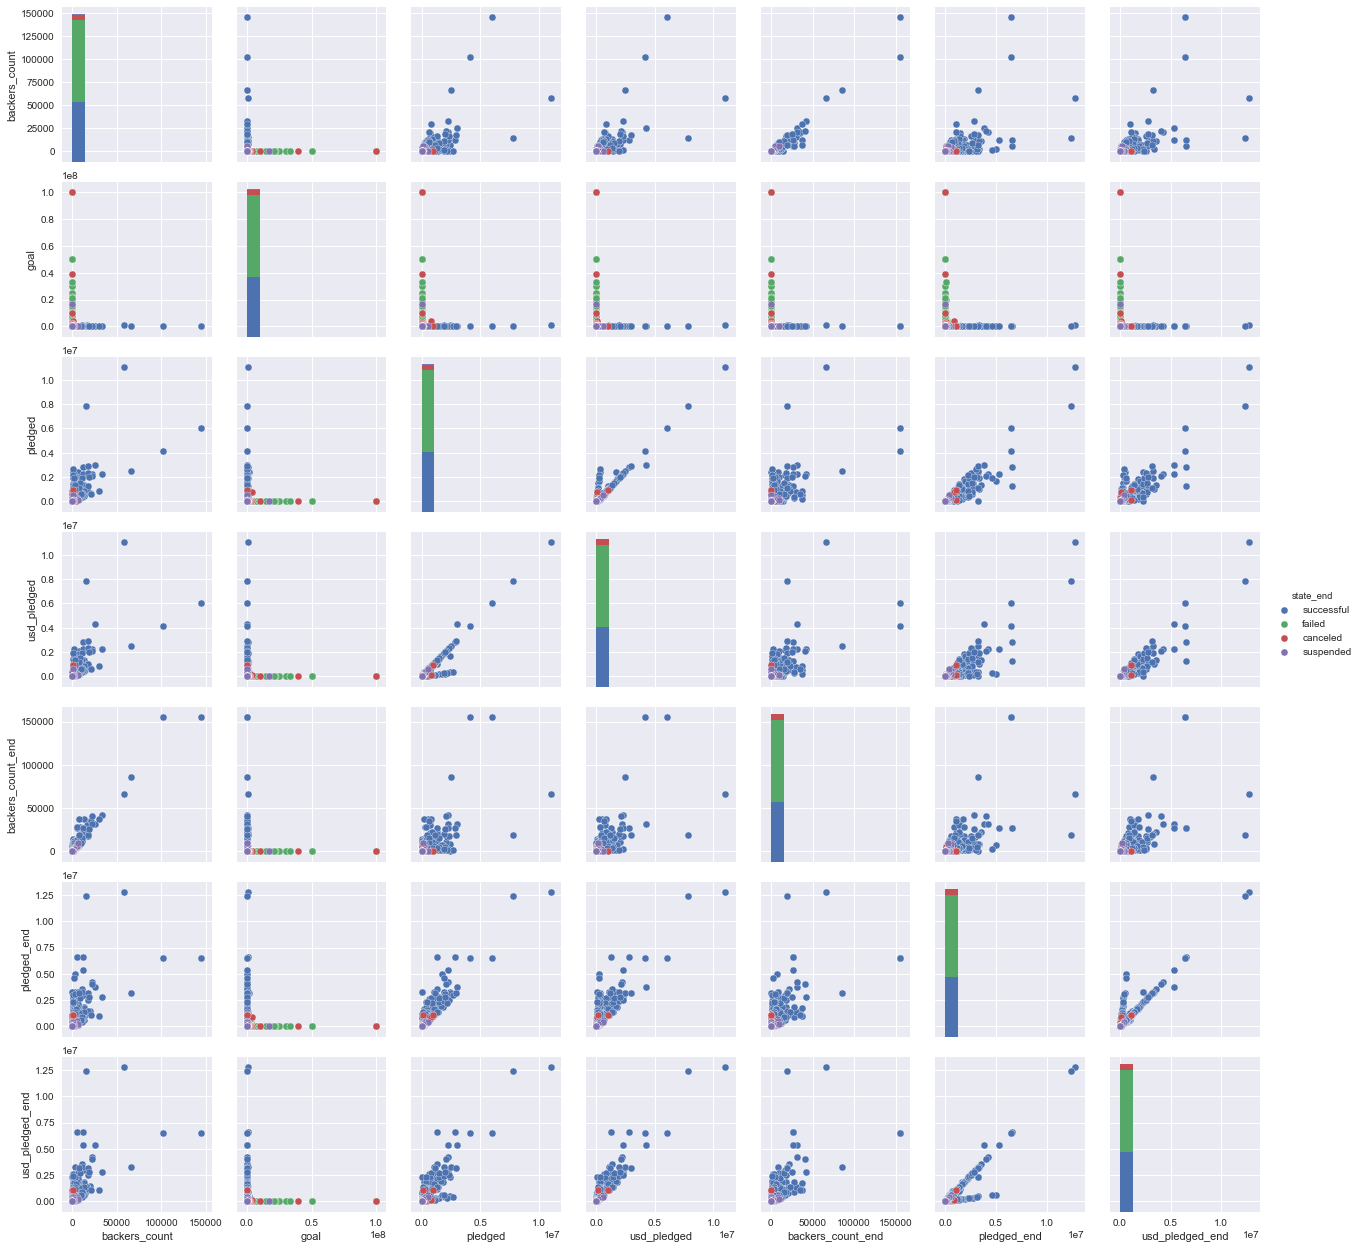

In [53]:
figure = sns.pairplot(df_projects[selected_cols], hue='state_end')

In [47]:
figure.savefig('figure.png', format='png', dpi=200)

#### backers_count

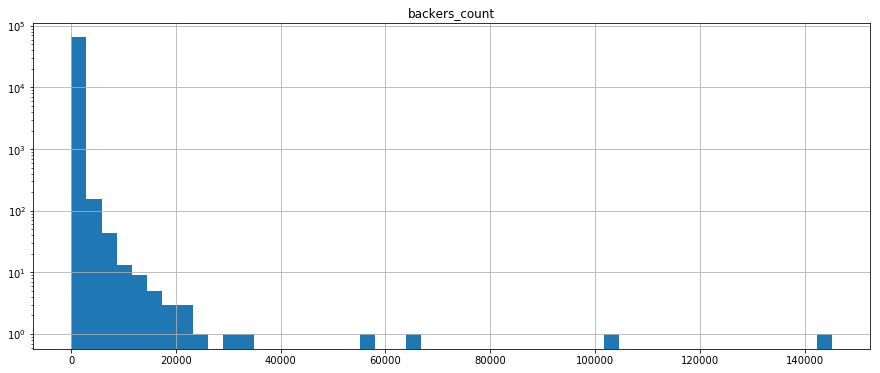

In [28]:
df_projects.hist(column='backers_count', bins=50)
plt.yscale('log')

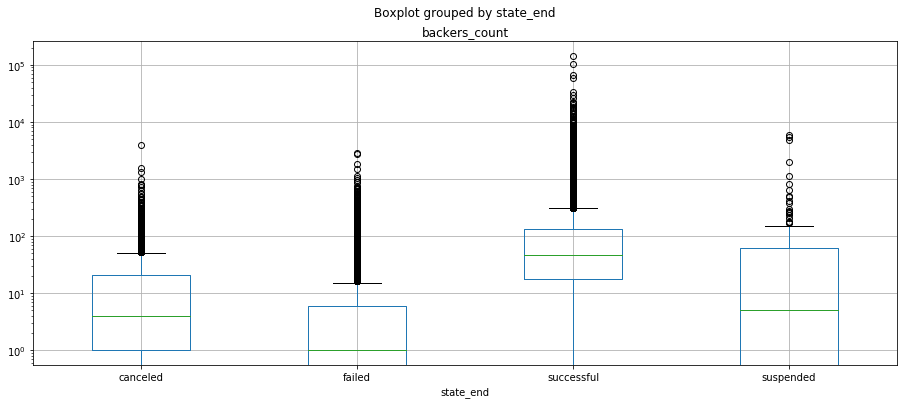

In [9]:
bp = df_projects.boxplot(column='backers_count', by='state_end')
plt.yscale('log')

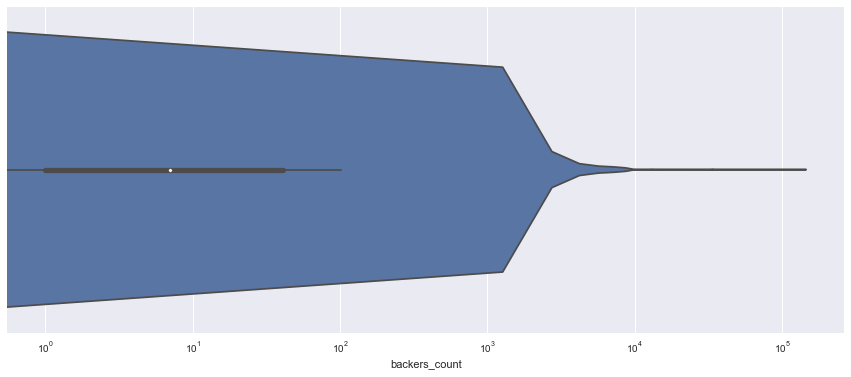

In [72]:
sns.violinplot(df_projects['backers_count'], width=20)
plt.xscale('log')

#### goal

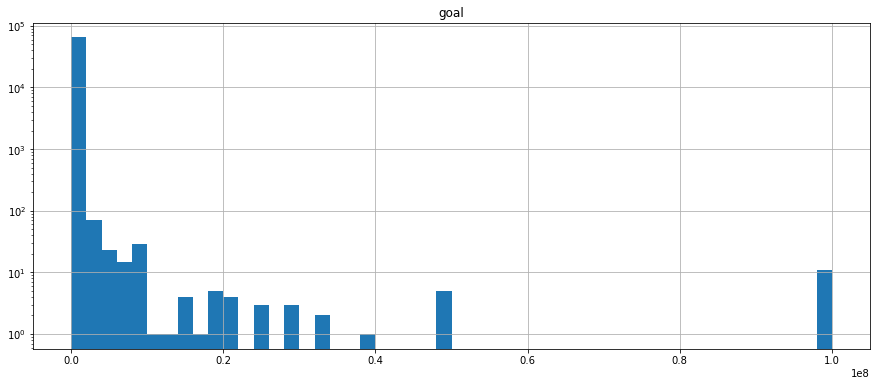

In [27]:
df_projects.hist(column='goal', bins=50)
plt.yscale('log')

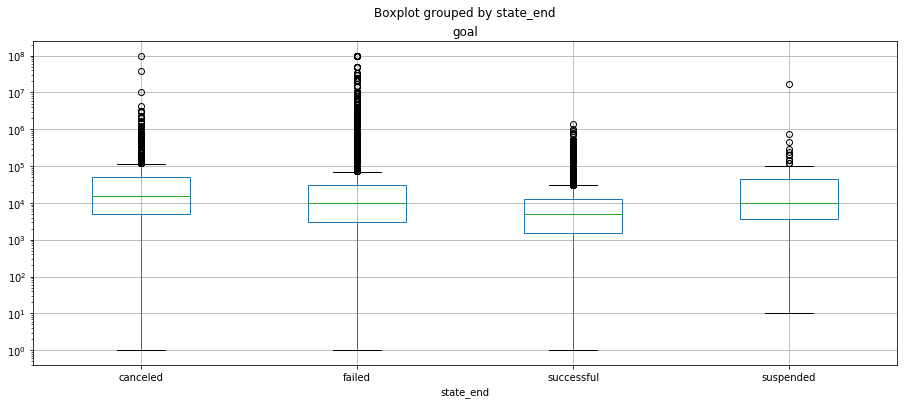

In [14]:
bp = df_projects.boxplot(column='goal', by='state_end')
plt.yscale('log')

#### pledged

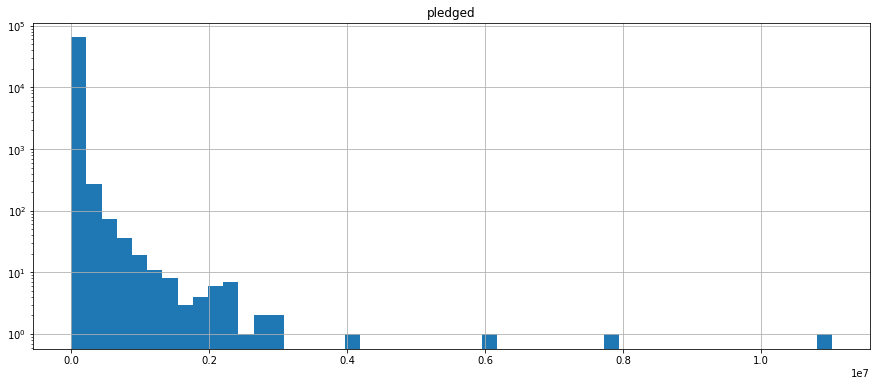

In [18]:
df_projects.hist(column='pledged', bins=50)
plt.yscale('log')

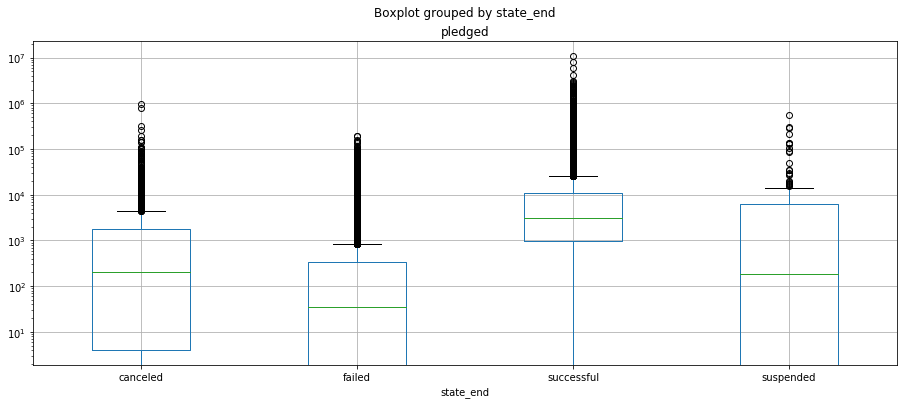

In [19]:
bp = df_projects.boxplot(column='pledged', by='state_end')
plt.yscale('log')

#### usd_pledged

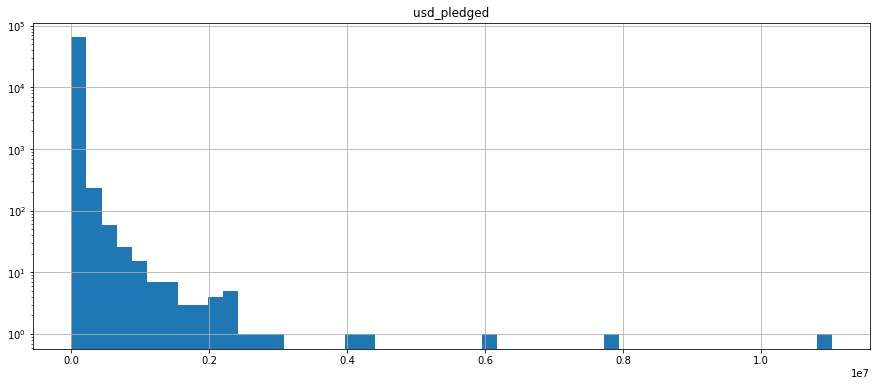

In [20]:
df_projects.hist(column='usd_pledged', bins=50)
plt.yscale('log')

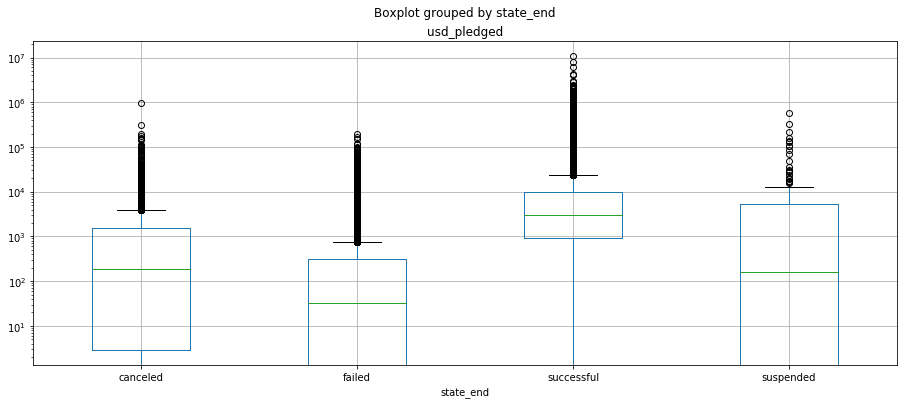

In [21]:
bp = df_projects.boxplot(column='usd_pledged', by='state_end')
plt.yscale('log')

#### backers_count_end

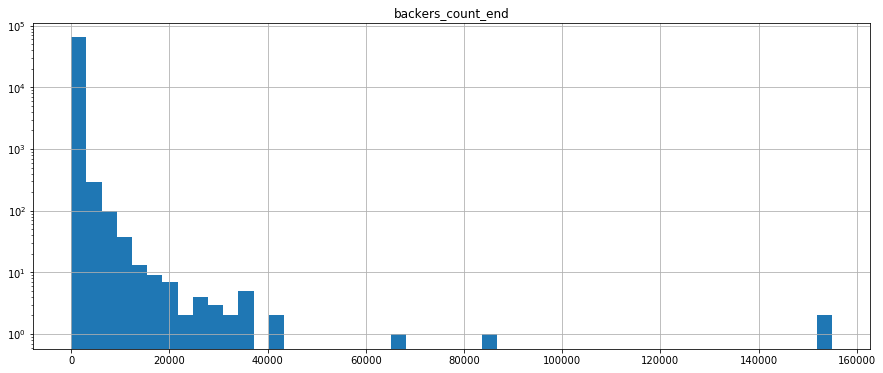

In [29]:
df_projects.hist(column='backers_count_end', bins=50)
plt.yscale('log')

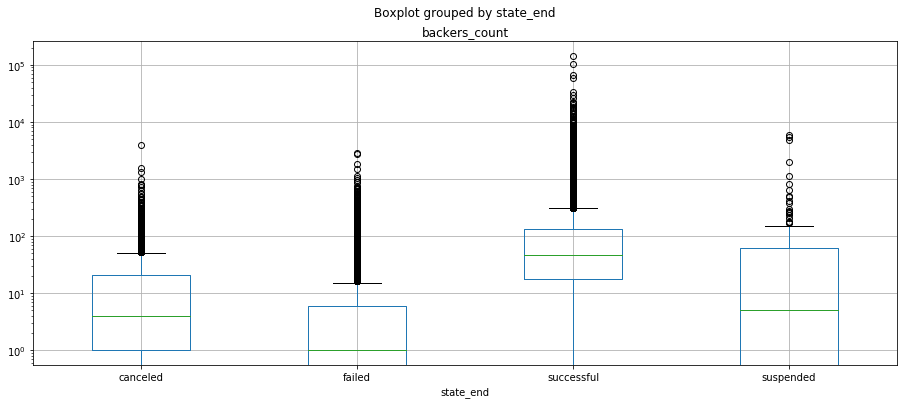

In [30]:
bp = df_projects.boxplot(column='backers_count', by='state_end')
plt.yscale('log')

#### pledged_end

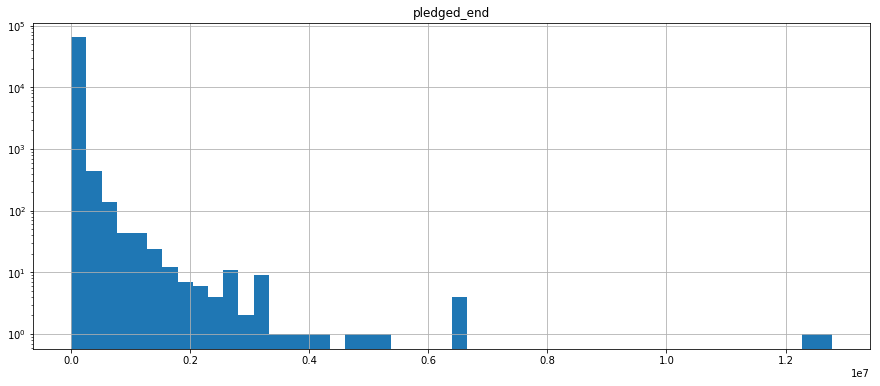

In [31]:
df_projects.hist(column='pledged_end', bins=50)
plt.yscale('log')

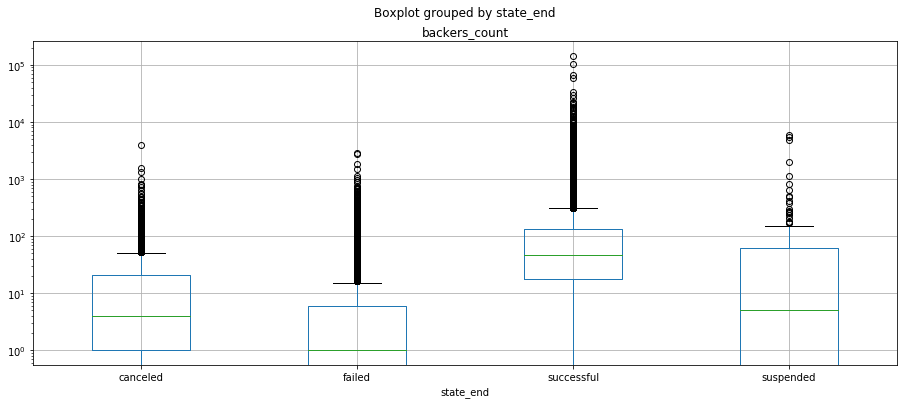

In [32]:
bp = df_projects.boxplot(column='backers_count', by='state_end')
plt.yscale('log')

#### usd_pledged_end

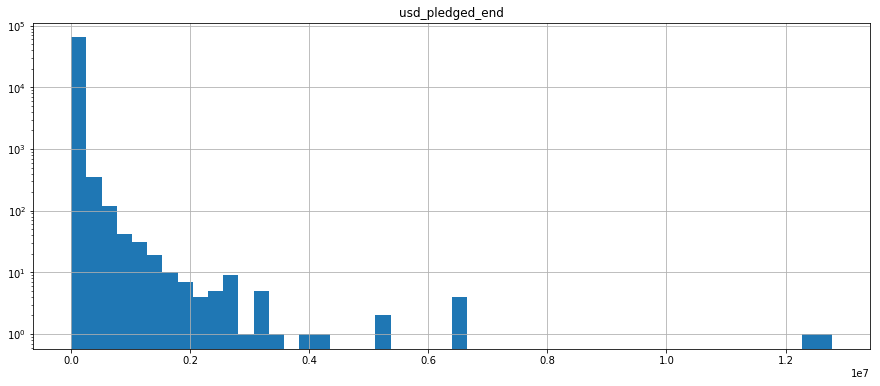

In [33]:
df_projects.hist(column='usd_pledged_end', bins=50)
plt.yscale('log')

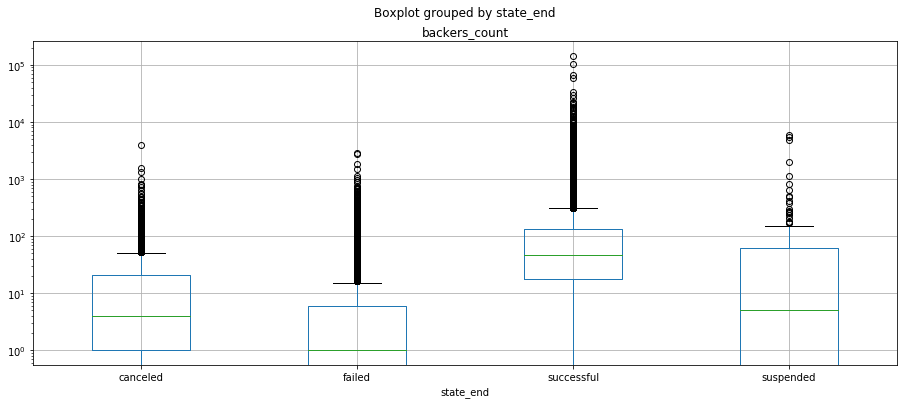

In [34]:
bp = df_projects.boxplot(column='backers_count', by='state_end')
plt.yscale('log')

All of seven variables have similar **long tale distribution**. Also pledged and usd_pledged equivalents are very similar which suggests that most of projects collected their money in USD. Let's look at categorical variables to find out.

### Categorical variables

In [44]:
selected_cols = [
    'country',
    'currency',
    'currency_symbol',
    'currency_trailing_code',
    'disable_communication',
    'state',
    'spotlight',
    'disable_communication_end',
    'spotlight_end',
    'state_end',
    'staff_pick',
    'staff_pick_end'
]

In [45]:
df_projects[selected_cols].head()

,country,currency,currency_symbol,currency_trailing_code,disable_communication,state,spotlight,disable_communication_end,spotlight_end,state_end,staff_pick,staff_pick_end
0,US,USD,$,True,False,live,False,False,True,successful,NaN,NaN
1,NL,EUR,€,False,False,live,False,False,False,failed,NaN,NaN
2,US,USD,$,True,False,live,False,False,False,failed,NaN,NaN
3,US,USD,$,True,False,live,False,False,True,successful,NaN,False
4,US,USD,$,True,False,live,False,False,True,successful,NaN,False


In [54]:
for col in selected_cols:
    print('\n>>> '+col+':')
    print(df_projects[col].value_counts())


>>> country:
US    43245
GB     6757
CA     3296
AU     1814
DE     1598
IT     1362
FR     1291
ES     1018
MX      854
NL      649
SE      569
CH      373
DK      330
BE      329
NZ      317
IE      265
AT      253
NO      245
SG      225
HK      224
LU       23
JP        1
Name: country, dtype: int64

>>> currency:
USD    43245
EUR     6788
GBP     6757
CAD     3296
AUD     1814
MXN      854
SEK      569
CHF      373
DKK      330
NZD      317
NOK      245
SGD      225
HKD      224
JPY        1
Name: currency, dtype: int64

>>> currency_symbol:
$      49975
€       6788
?       6758
kr      1144
Fr       373
Name: currency_symbol, dtype: int64

>>> currency_trailing_code:
True     51119
False    13919
Name: currency_trailing_code, dtype: int64

>>> disable_communication:
False    65038
Name: disable_communication, dtype: int64

>>> state:
live    65038
Name: state, dtype: int64

>>> spotlight:
False    65038
Name: spotlight, dtype: int64

>>> disable_communication_end:
False    6491

In [58]:
# 'currency_symbol' carries the same information as currency
# 'state' is always live
df_projects.drop(['currency_symbol','state'], axis=1, inplace=True)

ValueError: labels ['currency_symbol' 'state'] not contained in axis

In [69]:
# https://www.theguardian.com/technology/2015/mar/25/kickstarter-spotlight-crowdfunding-successful-projects
# 'spotlight_end' basicaly means 'is_successfull'
# proof:
df_projects[(df_projects['spotlight_end']==True) & (df_projects['state_end']=='successfull')]

,backers_count,blurb,category,country,created_at,creator,currency,currency_trailing_code,disable_communication,goal,...,profile_end,scraped_at_end,source_url_end,spotlight_end,staff_pick_end,state_end,state_changed_at_end,static_usd_rate_end,urls_end,usd_pledged_end


In [64]:
# https://www.kickstarter.com/blog/introducing-projects-we-love-badges
# 'staff_pick'

'{"web":{"project":"https://www.kickstarter.com/projects/64519019/verve-collisionz?ref=category","rewards":"https://www.kickstarter.com/projects/64519019/verve-collisionz/rewards"}}'

In [ ]:
df_projects['state_end'].value_counts()

In [ ]:
df_projects['deadline_end'].plot(kind='hist', bins=100, title='Distribution of project deadlines')

In [ ]:
df_projects['deadline_end'].plot(kind='box', title='Distribution of project deadlines')

In [ ]:
df_projects.boxplot(column='deadline_end', by='state_end')

In [ ]:
from datetime import datetime

In [ ]:
df = df_projects.apply(lambda x: datetime.fromtimestamp(x['scraped_at']), axis=1)
df.hist(bins=23, figsize=(15,6))

In [ ]:
df = df_projects.apply(lambda x: (datetime.fromtimestamp(x['scraped_at']) - datetime.fromtimestamp(x['launched_at_end'])).days, axis=1)
df

In [ ]:
df.hist(bins=30)

In [ ]:
df = df_projects.apply(lambda x: (datetime.fromtimestamp(x['deadline_end']) - datetime.fromtimestamp(x['scraped_at'])).days, axis=1)

In [ ]:
df.hist(bins=30, figsize=(15,10))

In [ ]:
df = df_projects.apply(lambda x: (datetime.fromtimestamp(x['scraped_at_end']) - datetime.fromtimestamp(x['deadline_end'])).days, axis=1)

In [ ]:
df.hist(bins=10)

In [ ]:
import seaborn

In [ ]:
seaborn.pairplot(df_projects.dropna(), hue='state')

# Second dataset

In [ ]:
import mysql.connector as sql

In [ ]:
con = sql.connect(database='kickstarter', user='kickstarter', password='kickstarter')

In [ ]:
df_db = pd.read_sql('SELECT * FROM kickstarter.kickstarter_project', con, index_col='project_id')
df_db.head()

In [ ]:
df_db.tail()

In [ ]:
df_db.info()

In [ ]:
# project_id is sequence but we could use url for merging with first dataset
df_db.loc[1, 'url']

In [ ]:
df_projects.loc[1, 'urls']

In [ ]:
import ast

In [ ]:
# get project_url
df_projects['project_url'] = df_projects.apply(lambda x: ast.literal_eval(x['urls'])['web']['project'].split('?')[0], axis=1)

In [ ]:
# merge first and second dataset
df_projects.info()

In [ ]:
df_merged = df_projects.merge(df_db, left_on='project_url', right_on='url')

In [ ]:
df_merged.info()

In [ ]:
df_merged.to_csv('merged.csv')

In [ ]:
x = df_projects[~df_projects['id'].isin(df_merged['id'])]
x.loc[380, 'project_url']

In [ ]:
x

In [ ]:
x = x.drop_duplicates(subset='id')
x

In [ ]:
x = x.drop_duplicates(subset='project_url')
x

In [ ]:
x['project_url'].value_counts().sort_values(ascending=False)

In [ ]:
x[x['id']==6186729].loc[14136, 'project_url']

In [ ]:
x[x['id']==6186729].loc[14137, 'project_url']

In [ ]:
x['project_url'].to_csv('urls.csv', index=False)

In [ ]:
pd.read_csv('urls.txt')

In [ ]:
df_projects['state']